In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam #adaptive learning method
import matplotlib.pyplot as plt

Using TensorFlow backend.


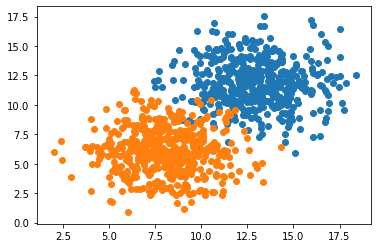

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [3]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2, ), activation = 'sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size = 50, epochs = 1000, shuffle = 'true')


1000
1000/1000 [==============================] - 0s 32us/step - loss: 0.0677 - accuracy: 0.9730
Epoch 815/1000
1000/1000 [==============================] - 0s 31us/step - loss: 0.0663 - accuracy: 0.9770
Epoch 816/1000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0599 - accuracy: 0.9760
Epoch 817/1000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0673 - accuracy: 0.9740
Epoch 818/1000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0627 - accuracy: 0.9760
Epoch 819/1000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0663 - accuracy: 0.9770
Epoch 820/1000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0694 - accuracy: 0.9740
Epoch 821/1000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0646 - accuracy: 0.9770
Epoch 822/1000
1000/1000 [==============================] - 0s 31us/step - loss: 0.0627 - accuracy: 0.9780
Epoch 823/1000
1000/1000 [=====================

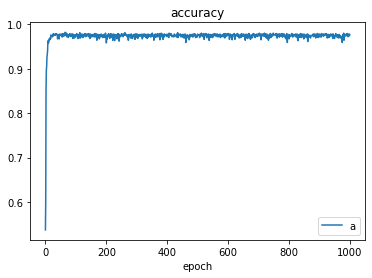

In [4]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend('accuracy')

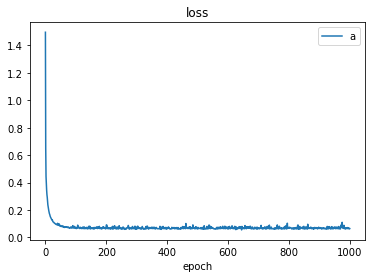

In [5]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend('accuracy')

In [6]:
def plot_decision_boundary(x, y, model):
    x_span = np.linspace(min(X[:,0])-1, max(X[:,0])+1)
    y_span = np.linspace(min(X[:,1])-1, max(X[:,1])+1) #50 because batch size is 50
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    print(grid)
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
    
    plt.scatter(X[:n_pts,0], X[:n_pts,1])
    plt.scatter(X[n_pts:,0], X[n_pts:,1])

[[ 1.01077428 -0.08247762]
 [ 1.38591048 -0.08247762]
 [ 1.76104668 -0.08247762]
 ...
 [18.6421757  18.51871023]
 [19.0173119  18.51871023]
 [19.39244811 18.51871023]]


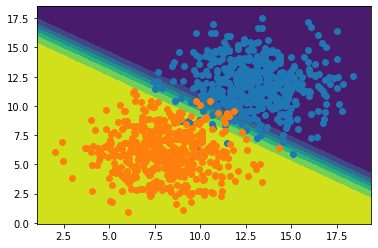

In [7]:
plot_decision_boundary(X, y , model)

[[ 1.01077428 -0.08247762]
 [ 1.38591048 -0.08247762]
 [ 1.76104668 -0.08247762]
 ...
 [18.6421757  18.51871023]
 [19.0173119  18.51871023]
 [19.39244811 18.51871023]]
prediction is:  [[9.326361e-05]]


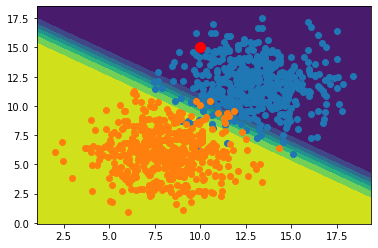

In [8]:
plot_decision_boundary(X, y , model)
x = 10
y = 15
 
 
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)